# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [36]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode, gaussian_kde

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [37]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].str.len()
df 

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [38]:
# Calcula media, mediana y moda de la columna 'title_length'

# Media
media_title_length = df['title_length'].mean()

# Mediana
mediana_title_lenght = df['title_length'].median()

# Moda
moda_title_length = df['title_length'].mode()

result = {"Media del titulo": float(media_title_length),
          "Mediana del titulo": float(mediana_title_lenght),
          "Moda del titulo": float(moda_title_length)}
result

/tmp/ipykernel_2492/1162704877.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Moda del titulo": float(moda_title_length)}


{'Media del titulo': 15.481103166496425,
 'Mediana del titulo': 14.0,
 'Moda del titulo': 12.0}

In [39]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

# Rango
rango_ = df['title_length'].max() - df['title_length'].min()
f" El rango de la columna Longitud del titulo es {rango_}"


' El rango de la columna Longitud del titulo es 67'

In [40]:
# Varianza
varianza = df['title_length'].var()
f" La varianza de la columna Longitud del titulo es {varianza:.2f}"


' La varianza de la columna Longitud del titulo es 72.11'

In [41]:

# Desviacion estandar
std = df['title_length'].std()
f" La desviación estándar de la columna Longitud del titulo es {std:.2f}"

' La desviación estándar de la columna Longitud del titulo es 8.49'

In [42]:
# Calcula asimetría y curtosis de la columna 'title_length'

# Asimetria
skewness = df['title_length'].skew()
f"Asimetría (Skewness): {skewness:.2f}"


'Asimetría (Skewness): 1.53'

In [43]:
# Curtosis
kurt = df['title_length'].kurt()
f"Curtosis (Kurtosis): {kurt:.2f}"

'Curtosis (Kurtosis): 3.81'

In [44]:
# Imprime el título más corto y el título más largo según su longitud
max_title_length = df.loc[df["title_length"].idxmax(), "title"]
min_title_length = df.loc[df["title_length"].idxmin(), "title"]

result_len_title_lenth = {"Titulo mas largo": max_title_length,
                          "Titulo mas corto": min_title_length}

result_len_title_lenth

{'Titulo mas largo': 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb',
 'Titulo mas corto': 'M'}

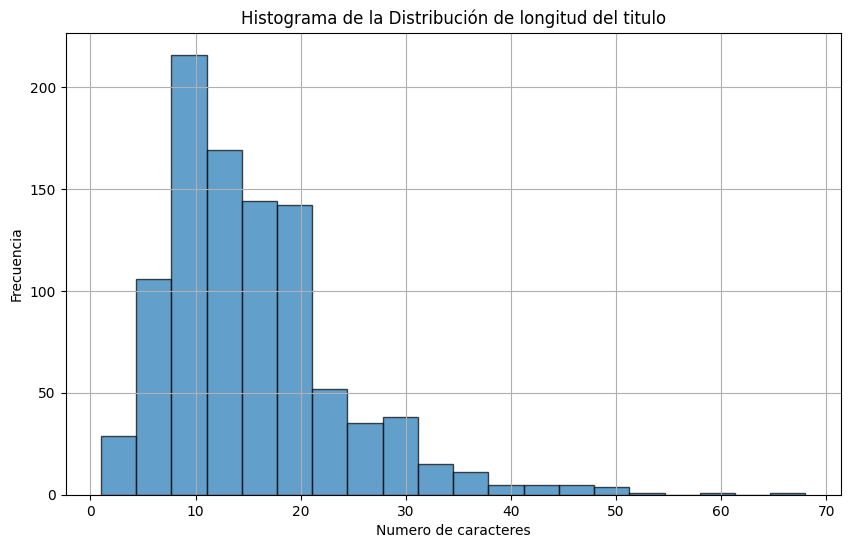

In [45]:
# grafica tus resultados
plt.figure(figsize=(10, 6))
df['title_length'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.title('Histograma de la Distribución de longitud del titulo')
plt.xlabel('Numero de caracteres')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [46]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista = [13, 24, 12, 15, 22]
lista

[13, 24, 12, 15, 22]

In [47]:
# Calcula la media de los 5 valores
media = sum(lista) / len(lista)
media

17.2

In [48]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_al_cuadrado = sum((x - media)**2 for x in lista)
diferencias_al_cuadrado

118.8

In [49]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = diferencias_al_cuadrado / (len(lista) -1)
desviacion = varianza ** 0.5

resultado_var_des = {"varianza": varianza , 
                     "Desviacion": desviacion}

resultado_var_des

{'varianza': 29.7, 'Desviacion': 5.449770637375485}

### Creamos nuestra linea KDE

In [62]:
data = np.array(lista)
kde = gaussian_kde(data)
x = np.linspace(data.min(), data.max(), 200)
y = kde(x)

### Graficamos nuestros calculos


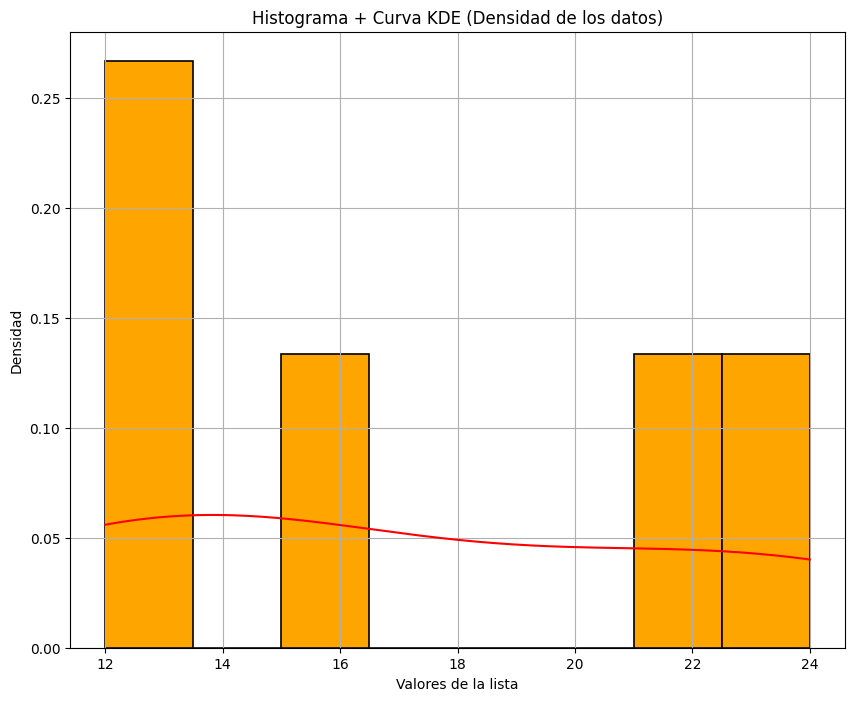

In [65]:
plt.figure(figsize=(10,8))
plt.hist(lista, bins=8, density=True, edgecolor="black", linewidth=1.2, color='orange')
plt.plot(x, y, color='red')
plt.title("Histograma + Curva KDE (Densidad de los datos)")
plt.xlabel("Valores de la lista")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()